## Задание

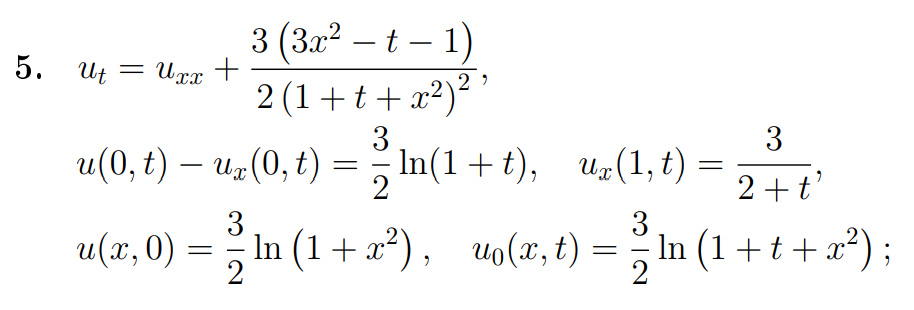

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
tau = 0.05
h = 0.05
T = 1
N = int(T / tau)
I = int(1 / h)

a = 1

sig = 0.5

omega_h = np.linspace(0, 1, I+1)
omega_tau = np.linspace(0, T, N+1)

u_teor = np.zeros((I+1, N+1))
u = np.zeros((I+1, N+1))

a0 = 1 
bo = -1

al = 0
bl = 1

# Зададим коэффициенты матрицы

A = np.zeros(I+1)
B = np.zeros(I+1)
C = np.zeros(I+1)
D = np.zeros(I+1)

In [23]:
def f(x,t):
    return (3*(3*x*x - t -1)) / (2*(1 + t + x*x)*(1 + t + x*x)) 

def gamma_0(t):
    return (3/2)*np.log(1+t)

def gamma_l(t):
    return 3/(2+t)

def u0(x,t):
    return (3/2)*np.log(1+t+x*x)

def phi(x):
     return (3/2)*np.log(1+x*x)

# Апроксимация граничных условий

# Первый порядок точности
def first_precision(n):
    u[0][n+1] = (gamma_0(omega_tau[n+1])*h - bo*u[1][n+1])/(a0*h - bo)
    u[I][n+1] = (gamma_l(omega_tau[n+1])*h - bl*u[I-1][n+1])/(al*h - bl)
    
    A[0] = a0 - bo/h
    B[0] = b0/h
    С[0] = b0
    
    
# Второй порядок точности
def second_precision(n):
    u[0][n+1] = (gamma_0(omega_tau[n+1]) - (bo/(2*h))*(((h*h)/(a*a*tau))*u[0][n] + ((h*h)/(a*a))*f(omega_h[0], omega_tau[n+1])))/(a0-(bo/(2*h))*(2+((h*h)/(a*a*tau))))
    u[I][n+1] = (gamma_l(omega_tau[n+1]) - (bl/(2*h))*(((h*h)/(a*a*tau))*u[I][n] - ((h*h)/(a*a))*f(omega_h[I], omega_tau[n+1])))/(al+(bl/(2*h))*(2+((h*h)/(a*a*tau))))
    
    A[0] = 0
    B[0] = 2*a0*h - 2*b0 - (b0*h*h)/(tau*a*a)
    С[0] = 2*b0
    
    for i in range(1, I):
        A[i] = A
        B[i] = B
        C[i] = C
    
    A[I]

In [29]:
# Апроксимация начальных условий и поиск численного решения на нулевом слое по времени
for i in range(I+1):
    u[i][0] =  phi(omega_h[i])

#for n in range(2, N+1):
    #for i in range(1, I):
     #   u[i][n] = 
    #second(n-1)
    


In [ ]:

# Прямой ход прогонки
def straight():
    #a, b = [-B[0]/A[0]], [D[0]/A[0]]
    for i in range(1, I):
        a.append()

## 1 порядок

In [26]:
def progon_1(h_t):
    
    N = int((b - a)/h_t)
    x_lin_ = np.linspace(a, b, num = N + 1)

    A, B, C = get_T_1(h_t, x_lin_, N)

    D = get_D_1(h_t, x_lin_, N)
    
    a_l, b_l = tuda(A, B, C, D, N)
    
    return obratno(B[-1], C[-1], D[-1], a_l, b_l, N)

## 2 порядок

In [27]:
def progon_2(h_t):
    
    N = int((b - a)/h_t)
    x_lin_ = np.linspace(a, b, num = N + 1)
    
    A, B, C = get_T_2(h_t, x_lin_, N)

    D = get_D_2(h_t, x_lin_, N)
    
    a_l, b_l = tuda(A, B, C, D, N)
    
    return obratno(B[-1], C[-1], D[-1], a_l, b_l, N)

## Коэффициенты матрицы системы

In [28]:
def get_T_1(h, x_lin, N):
    
    A = np.zeros(N + 1)
    A[0] = g_a - n_a/h
    A[1:N] = np.array(1/h**2 - p(x_lin[1:-1])/2/h)
    A[-1] = 0

    B = np.zeros(N + 1)
    B[0] = n_a/h
    B[1:N] = np.array(-2/h**2 + q(x_lin[1:-1]))
    B[-1] = -n_b/h

    C = np.zeros(N + 1)
    C[0] = 0
    C[1:N] = np.array(1/h**2 + p(x_lin[1:-1])/2/h)
    C[-1] = g_b + n_b/h

    return A, B, C

def get_D_1(h, x_lin, N):
    
    N = int((b - a)/h)
    D = np.zeros(N + 1)
    D[0] = y_a
    D[1:N] = np.array(f(x_lin[1:-1]))
    D[-1] = y_b
    
    return D

def get_T_2(h, x_lin, N):
    
    N = int((b - a)/h)
    A = np.zeros(N + 1)
    A[0] = g_a - n_a*(2 - q(x_lin[0])*h*h)/(2 - h*p(x_lin[0]))/h
    A[1:N] = np.array(1/h**2 - p(x_lin[1:-1])/2/h)
    A[-1] = 0

    B = np.zeros(N + 1)
    B[0] = n_a*(1 + (2 + p(x_lin[0])*h)/(2 - p(x_lin[0])*h))/2/h
    B[1:N] = np.array(-2/h**2 + q(x_lin[1:-1]))
    B[-1] = -n_b*(1 + (2 - p(x_lin[-1])*h)/(2 + p(x_lin[-1])*h))/2/h

    C = np.zeros(N + 1)
    C[0] = 0
    C[1:N] = np.array(1/h**2 + p(x_lin[1:-1])/2/h)
    C[-1] = g_b + n_b*(2 - q(x_lin[-1])*h*h)/h/(2 + h*p(x_lin[-1]))

    return A, B, C

def get_D_2(h, x_lin, N):
    
    N = int((b - a)/h)
    D = np.zeros(N + 1)
    D[0] = y_a + n_a*h*f(x_lin[0])/(2 - h*p(x_lin[0]))
    D[1:N] = np.array(f(x_lin[1:-1]))
    D[-1] = y_b - n_b*h*f(x_lin[-1])/(2 + h*p(x_lin[-1]))
    
    return D